In [2]:
#dataframes
import pandas as pd
import numpy as np
#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#plots
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.patches as mpatches
from figurefirst import FigureLayout,mpl_functions
import figurefirst as fifi


import fly_plot_lib.plot as fpl
FS=7


In [3]:
dir = '../../../data/'
val=pd.read_hdf(dir+'aic_filtered_model_params.h5')
std_wind_dir = np.array([8.17,27.03,44.94])

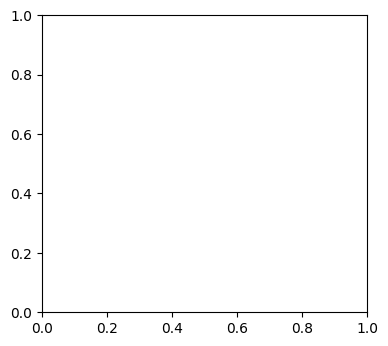

In [4]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/windAicParams.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [10]:
ax=layout.axes[('fig','ax')]

ax.grid(False)
# xaxis=np.array([0,0.5,1])
ax.plot(std_wind_dir,val.transpose().iloc[0].values,c='b',label='intercept', rasterized=True)
ax.plot(std_wind_dir,val.transpose().iloc[1].values,c='g',label='$\mu(WC)$', rasterized=True)
ax.plot(std_wind_dir,val.transpose().iloc[2].values,c='r',label='$\sigma(WMA)$', rasterized=True)
ax.plot(std_wind_dir,val.transpose().iloc[3].values,c='black',label='$max(WMA)$', rasterized=True)
ax.plot(std_wind_dir,val.transpose().iloc[4].values,c='purple',label='$\sigma(WD)$', rasterized=True)

ax.set_rasterization_zorder(-20)
ax.grid(False)
ax.set_ylabel('Model Co-efficients')
ax.set_xlabel('$\mu(\sigma$(Wind Direction)), degrees')

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,   
                            xticks=std_wind_dir,
                            yticks=[-10,40,100],
                            linewidth=0.5)

ax.set_xticklabels(['HWS=8.17','LWS=27.04','Forest=44.95'],rotation=0)

ax.legend(loc='upper right')


# f.savefig('../../Figure/TiWindSpeedR2WD.jpeg', dpi=300, bbox_inches = "tight")

mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../Figure/windAicParams.svg')